In [6]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v3
from draw import draw  #绘图函数
import tqdm

In [7]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v3.GridWorld_v3(forbiddenAreaScore=-10, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


In [8]:
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]

In [9]:
state_values = np.array([random.random() for i in range(25)])
learning_rate = 0.01
gamma = 0.99

  0%|                                                                               | 0/100 [00:00<?, ?it/s]

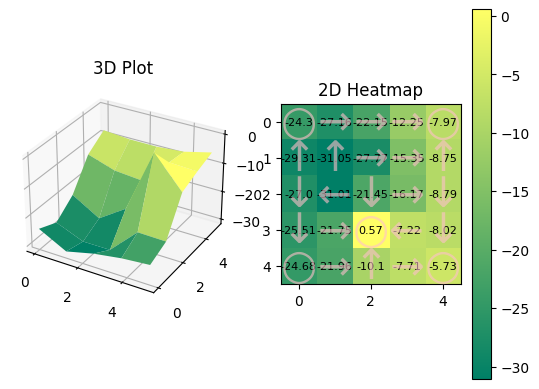

 19%|█████████████▎                                                        | 19/100 [00:01<00:06, 13.39it/s]

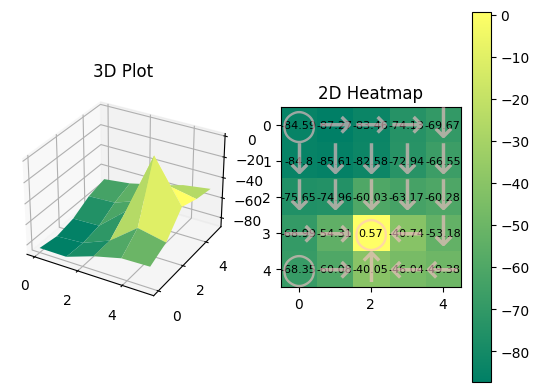

 39%|███████████████████████████▎                                          | 39/100 [00:03<00:04, 13.39it/s]

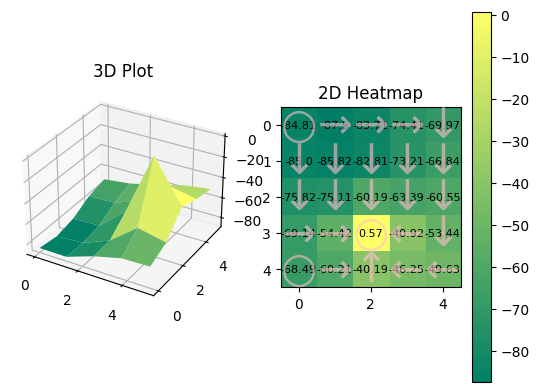

 59%|█████████████████████████████████████████▎                            | 59/100 [00:05<00:03, 13.30it/s]

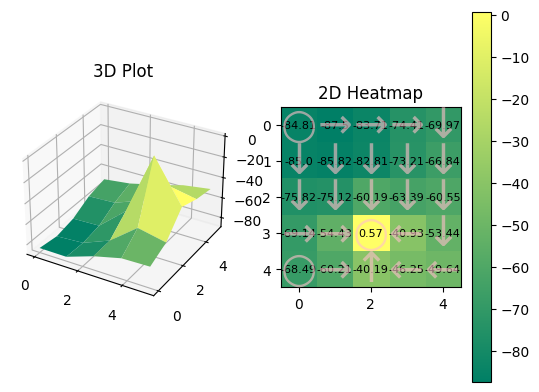

 79%|███████████████████████████████████████████████████████▎              | 79/100 [00:07<00:01, 12.95it/s]

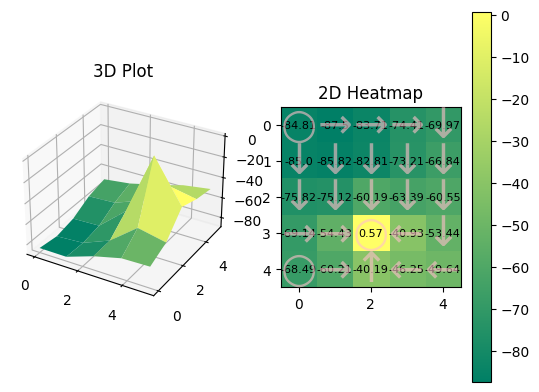

100%|█████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.61it/s]


In [10]:
for _ in tqdm.tqdm(range(100)):
    for i in range(len(episodes)):
        for j in range(len(episodes[i])-1,-1,-1):
            trajectory = episodes[i][j]
            tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = trajectory
            next_state_value = state_values[nextState]
            target = tmpscore + (1.0 - terminal) * gamma * next_state_value
    
            TD_error = state_values[tmpstate] - target
            
            state_values[tmpstate] -= learning_rate * TD_error
            
    if _ % 20 == 0:
        action_values = np.random.rand(25,5)
        for i in range(25):
            for j in range(5):
                score, nextState = gridworld.getScore(i,j)
                action_values[i][j] = score + gamma * state_values[nextState]
        
        p = np.argmax(action_values,axis=1)
        draw(state_values.reshape(5,5), p)